In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
dataframe = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/Finance_risk_analysis_default.csv')
dataframe

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50
...,...,...,...,...
9995,No,No,711.56,52992.38
9996,No,No,757.96,19660.72
9997,No,No,845.41,58636.16
9998,No,No,1569.01,36669.11


### looking for missing values

In [3]:
dataframe.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

No missing values

### Encoding

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
dataframe['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [6]:
dataframe['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

student and default columns are categorical feature, we need to apply Encoding. 

In [7]:
dataframe = pd.get_dummies(data=dataframe, drop_first=True)

In [8]:
dataframe.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [9]:
# Renaming columns in dataframe
dataframe.columns = ['balance', 'income', 'default', 'student']

In [10]:
dataframe

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


### Univariate and Bivariate analysis

In [11]:
dataframe.shape

(10000, 4)

In [12]:
dataframe.columns

Index(['balance', 'income', 'default', 'student'], dtype='object')

In [13]:
for i in dataframe.columns:
    print(i)
    print(set(dataframe[i].tolist()))
    print('**************'*3)

balance
{0.0, 11.14, 17.61, 17.03, 23.53, 23.36, 25.83, 30.58, 31.86, 36.84, 37.36, 38.3, 38.41, 40.09, 36.09, 36.36, 41.36, 44.31, 44.06, 46.09, 47.75, 48.91, 47.3, 48.53, 51.89, 51.53, 52.92, 54.05, 48.97, 56.97, 56.42, 57.22, 58.44, 60.19, 59.8, 62.17, 58.97, 59.97, 65.73, 66.63, 66.15, 67.23, 69.25, 70.98, 71.79, 72.17, 73.08, 74.53, 75.18, 76.99, 75.8, 76.13, 77.5, 80.75, 78.78, 82.09, 82.73, 84.86, 76.48, 80.6, 83.08, 81.42, 89.13, 90.93, 89.91, 90.68, 93.94, 94.93, 95.15, 95.3, 96.64, 94.12, 93.57, 97.03, 98.4, 102.17, 95.9, 104.44, 105.74, 106.25, 107.28, 107.6, 109.92, 110.57, 110.85, 112.33, 112.81, 114.18, 110.33, 111.06, 117.64, 111.29, 114.88, 115.84, 114.42, 118.6, 115.55, 124.7, 124.23, 126.36, 126.92, 127.71, 128.99, 126.56, 131.62, 127.41, 133.74, 134.86, 133.1, 136.51, 136.42, 138.25, 136.83, 135.63, 132.16, 136.2, 137.72, 143.1, 143.85, 146.74, 147.61, 148.15, 146.15, 149.02, 147.49, 152.87, 152.5, 153.26, 152.12, 153.45, 157.51, 158.57, 159.97, 153.4, 153.56, 162.45

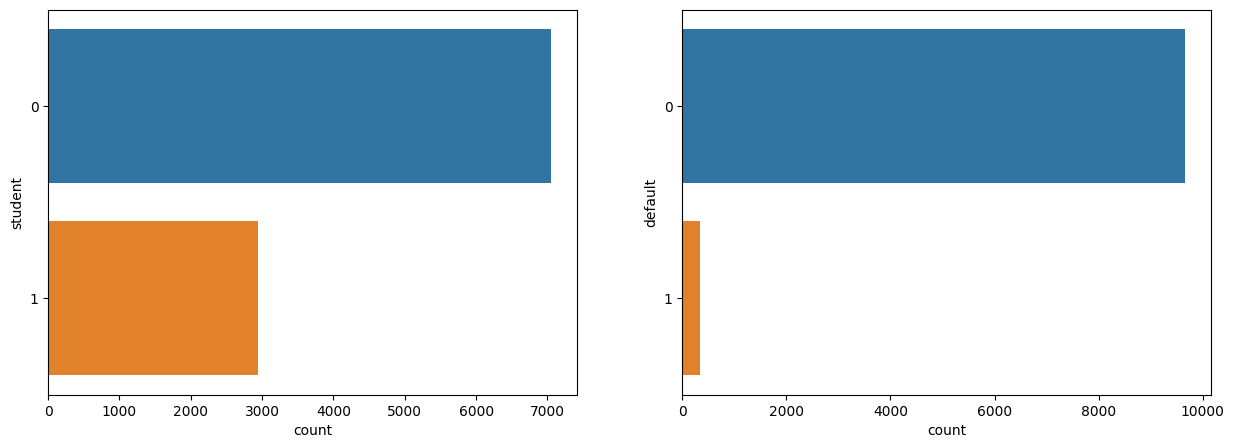

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y = dataframe['student'])

plt.subplot(1,2,2)
sns.countplot(y = dataframe['default'])
plt.show()

## Outlier detection

### IQR method

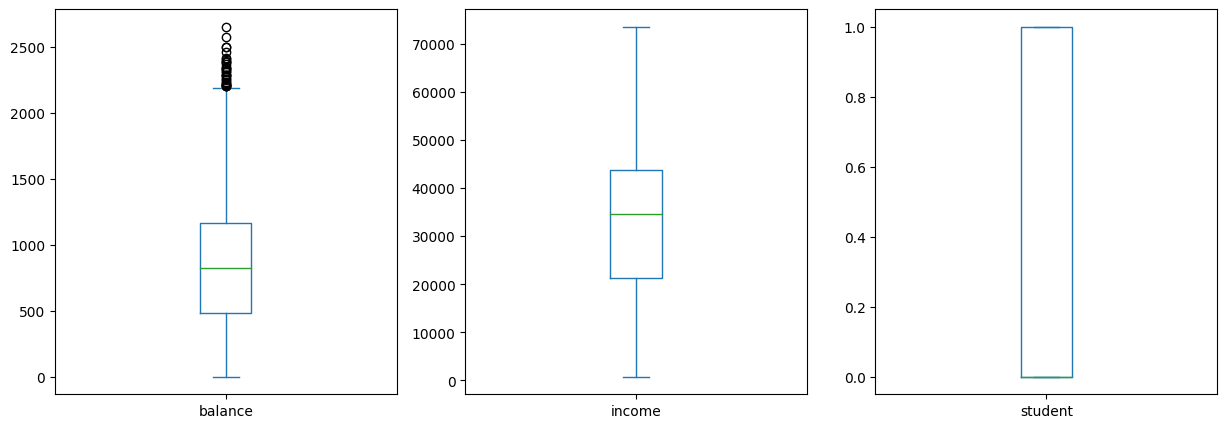

In [15]:
plt.figure(figsize=(15,5))
cols=1
for col in [i for i in dataframe.columns if i!='default']:
    plt.subplot(1,3,cols)
    dataframe[col].plot.box()
    cols+=1
    
plt.show()

balance feature has outliers 

In [16]:
def get_outliers(cols):
    for col in cols:
        print(col)
        q1, q3 = dataframe[col].quantile([0.25, 0.75])
        print("Q1 and Q3 :",q1, q3)

        iqr = q3-q1
        print("IQR :", iqr)

        pos_outlier = q3 + 1.5*iqr
        neg_outlier = q1 - 1.5*iqr
        print("Positive and Negative outliers :", pos_outlier, neg_outlier)

In [17]:
get_outliers(['balance', 'income', 'student'])

balance
Q1 and Q3 : 481.73249999999996 1166.305
IQR : 684.5725000000001
Positive and Negative outliers : 2193.16375 -545.1262500000001
income
Q1 and Q3 : 21340.46 43807.73
IQR : 22467.270000000004
Positive and Negative outliers : 77508.63500000001 -12360.445000000007
student
Q1 and Q3 : 0.0 1.0
IQR : 1.0
Positive and Negative outliers : 2.5 -1.5


<Axes: >

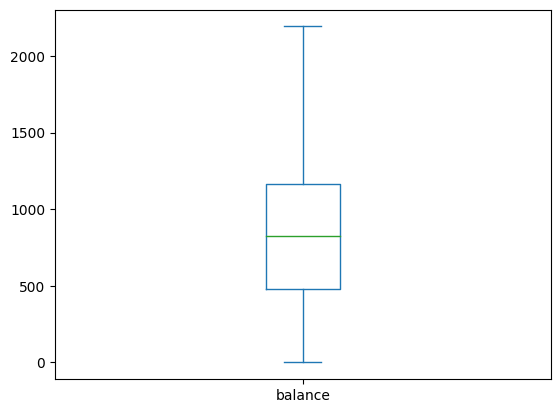

In [18]:
q1, q3 = dataframe['balance'].quantile([0.25, 0.75])
iqr = q3-q1

pos_outlier = q3 + 1.5*iqr
neg_outlier = q1 - 1.5*iqr

dataframe['balance'] = np.where(dataframe['balance'] > pos_outlier, pos_outlier, 
                                np.where(dataframe['balance'] < neg_outlier, neg_outlier, 
                                dataframe['balance']) )

dataframe['balance'].plot.box()

## Splitting the data into train and test dataset

In [19]:
x = dataframe.drop(columns=['default'], axis=0)
y = dataframe['default']

In [20]:
print(x.shape)
print(y.shape)


(10000, 3)
(10000,)


## Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

## Checking correlation

In [22]:
dataframe.corr()

,balance,income,default,student
balance,1.000000,-0.152161,0.346955,0.203217
income,-0.152161,1.000000,-0.019871,-0.753985
default,0.346955,-0.019871,1.000000,0.035420
student,0.203217,-0.753985,0.035420,1.000000


<Axes: >

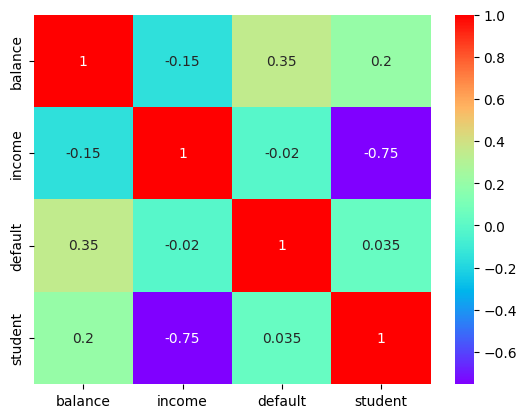

In [23]:
sns.heatmap(dataframe.corr(), annot=True, cmap='rainbow')

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(sc_x, i) for i in range(sc_x.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.043079,balance
1,2.317471,income
2,2.361330,student


Variance Inflation Factor all alues are below 5, so no co-relation problem

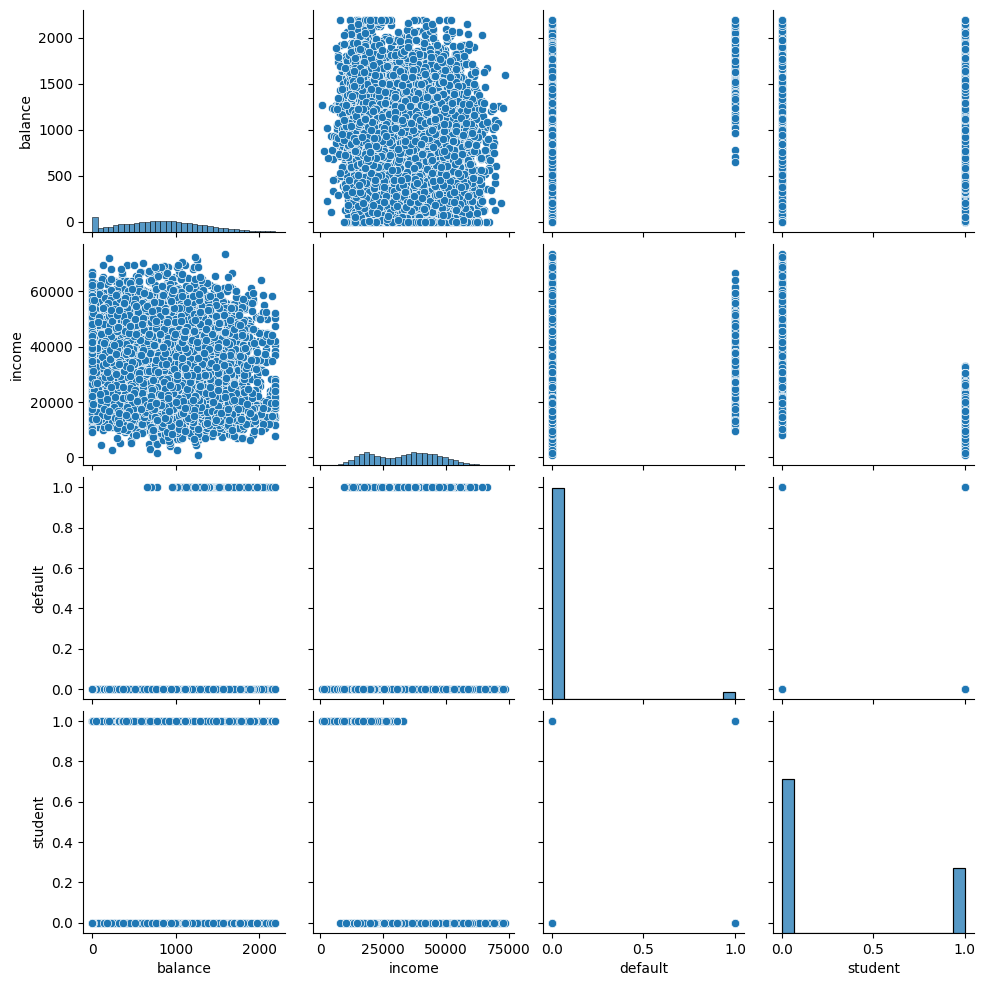

In [25]:
sns.pairplot(dataframe)

## Imbalance treatment

In [26]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

There is imbalance in the data

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(sc_x, y)
print(x_sam.shape, y_sam.shape)

(19334, 3) (19334,)


In [28]:
print(x.shape, y.shape)

print(sc_x.shape)

print(x_sam.shape, y_sam.shape)

(10000, 3) (10000,)
(10000, 3)
(19334, 3) (19334,)


## Building the models

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.20, random_state=2023)
print(x_train.shape, x_test.shape)

(15467, 3) (3867, 3)


In [30]:
15467+3867

19334

In [31]:
#Building logistic regression model

logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

### Model metrics

In [33]:
print('Training Accuracy')
print(accuracy_score(y_train, y_pred_train))


print('Testing Accuracy')
print(accuracy_score(y_test, y_pred_test))

Training Accuracy
0.8816189306264951
Testing Accuracy
0.8844065166795966


In [34]:
confusion_matrix(y_test, y_pred_test)

array([[1675,  261],
       [ 186, 1745]])

In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1936
           1       0.87      0.90      0.89      1931

    accuracy                           0.88      3867
   macro avg       0.88      0.88      0.88      3867
weighted avg       0.88      0.88      0.88      3867



## Regularization L1 and L2

In [36]:
logit_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logit_l1.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [37]:
y_pred_test_l1 = logit_l1.predict(x_test)

y_pred_train_l1 = logit_l1.predict(x_train)

In [38]:
print('Training Accuracy')
print(accuracy_score(y_train, y_pred_train_l1))


print('Testing Accuracy')
print(accuracy_score(y_test, y_pred_test_l1))

Training Accuracy
0.8815542768474818
Testing Accuracy
0.8844065166795966


In [39]:
logit_l2 = LogisticRegression(penalty='l2', solver='liblinear')
logit_l2.fit(x_train, y_train)

y_pred_test_l2 = logit_l2.predict(x_test)
y_pred_train_l2 = logit_l2.predict(x_train)

print('Training Accuracy')
print(accuracy_score(y_train, y_pred_train_l2))
print('Testing Accuracy')
print(accuracy_score(y_test, y_pred_test_l2))

Training Accuracy
0.8815542768474818
Testing Accuracy
0.8844065166795966


## Cross validation score

In [40]:
from sklearn.model_selection import cross_val_score

training_accuracy = cross_val_score(logit, x_train, y_train, cv=10)
testing_accuracy = cross_val_score(logit, x_train, y_train, cv=10)

print(training_accuracy)
print(testing_accuracy)

[0.88429218 0.88364577 0.87459599 0.87976729 0.87847447 0.87718164
 0.89786684 0.87580854 0.8835705  0.87839586]
[0.88429218 0.88364577 0.87459599 0.87976729 0.87847447 0.87718164
 0.89786684 0.87580854 0.8835705  0.87839586]


In [41]:
print(training_accuracy.mean())
print(testing_accuracy.mean())

0.8813599078799597
0.8813599078799597


## Hyper parameter tuning with Grid search cv and random search cv

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_cv = GridSearchCV()